# Perkenalan

Nama : Praduta Firman Anugrah
Data Science
Batch :001

Berikut ini adalah Problems yang akan dihadapi :

Kamu adalah seorang data scientist di salah satu perusahaan e-commerce. Saat ini, kamu terlibat dalam proyek bersama dengan tim produk dan tim UI/UX untuk merubah tampilan landing page. Menggunakan dataset dari https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt?token=AEZDEHRU5YLQEXGDDLCL6CLA2KZTI, menggunakan konsep central of tendency, apakah data cenderung berpusat pada purchased=0 atau purchased=1? dan buatlah analisa menggunakan konsep hypothesis testing dan A/B testing (Informasikan H0 dan H1 pada bagian Mathematical Calculation and Analysis). Apa kesimpulanmu terhadap hasil A/B testing?

Keterangan Dataset:

user_id = id pelanggan
timestamp = Waktu ketika pelanggan mengakses laman web
group = grup kontrol dan treatment
landing_page = landing page yang diakses oleh pelanggan (laman lama atau laman baru)
purchased = 0 : tidak ada pembelian, and 1: ada pembelian

# Import Pustaka

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

%matplotlib inline

# Data Loading

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt?token=AEZDEHRU5YLQEXGDDLCL6CLA2KZTI', sep=';')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [6]:
df.shape

(294478, 5)

# Data Processing

In [17]:
df.describe()

,user_id,purchased
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   group         294478 non-null  object
 2   landing_page  294478 non-null  object
 3   purchased     294478 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.7+ MB


In [7]:
df.columns = ['user_id','timestamp','group','landing_page','purchased']

In [8]:
df.drop(["timestamp"], axis = 1, inplace = True)
df.head()

,user_id,group,landing_page,purchased
0,851104,control,old_page,0
1,804228,control,old_page,0
2,661590,treatment,new_page,0
3,853541,treatment,new_page,0
4,864975,control,old_page,1


In [14]:
df.groupby(['group','landing_page']).count()['purchased']

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: purchased, dtype: int64

In [15]:
dfcompare = df.loc[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]

In [16]:
dfcompare['purchased'].value_counts()

0    128047
1     17264
Name: purchased, dtype: int64

In [39]:
df2 = df.query("group == 'treatment' & landing_page == 'new_page'")
df2.head()

,user_id,group,landing_page,purchased
2,661590,treatment,new_page,0
3,853541,treatment,new_page,0
6,679687,treatment,new_page,1
8,817355,treatment,new_page,1
9,839785,treatment,new_page,1


# Central Tendency

In [19]:
a = df['purchased'].value_counts()
a

0    259241
1     35237
Name: purchased, dtype: int64

Dapat dilihat bahwa data berpusat pada purchased nol (0) tidak ada pembelian

MEAN

In [20]:
a = df.groupby('purchased').size()
a.mean()

147239.0

MEDIAN

In [21]:
a.median()

147239.0

In [ ]:
MODUS

In [22]:
a.mode()

0     35237
1    259241
dtype: int64

# A/B Testing Implementation

Saya memisahkan menjadi 2 grup ;

treatment, new_page
control, old_page

In [24]:
dfcompare = df.loc[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
dfcompare["purchased"].value_counts()

0    128047
1     17264
Name: purchased, dtype: int64

In [25]:
dfcompare2 = df.loc[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]
dfcompare2["purchased"].value_counts()

0    127785
1     17489
Name: purchased, dtype: int64

In [26]:
dfcompare.describe()

,user_id,purchased
count,145311.000000,145311.000000
mean,787845.618446,0.118807
std,91161.258854,0.323563
min,630000.000000,0.000000
25%,708746.500000,0.000000
50%,787874.000000,0.000000
75%,866718.500000,0.000000
max,945999.000000,1.000000


In [27]:
dfcompare2.describe()

,user_id,purchased
count,145274.000000,145274.000000
mean,788164.072594,0.120386
std,91287.914601,0.325414
min,630002.000000,0.000000
25%,709279.500000,0.000000
50%,788128.500000,0.000000
75%,867208.250000,0.000000
max,945998.000000,1.000000


Saya menarik kesimpulan ada apa dengan ke 2 grup ini, bahwa :
- group section tidak terlalu berefek pada pembelian
- Kebanyakan orang yang berada di treatment menggunakan new_page
- Kebanyakan orang yang berada di control menggunakan old_page

Oleh karena itu saya membagikan ke 2 grup tersebut apakah betul atau tidak.

In [57]:
enc = LabelEncoder()
df['group'] = enc.fit_transform(df['group'])
df['landing_page'] = enc.fit_transform(df['landing_page'])

In [55]:
res = chi2(df.iloc[:, :4], df['purchased'])
features = pd.DataFrame({
    'features': df.columns[:4],
    'chi': res[0],
    'p-value': res[1]
})

In [56]:
features.head()

,features,chi,p-value
0,user_id,8971.316702,0.000000
1,group,0.764795,0.381832
2,landing_page,0.936169,0.333265
3,purchased,259241.000000,0.000000


In [54]:
crit = stats.chi2.ppf(q = 0.95, # menemkan critical value untuk 95% confidence*
                      df = 1)   # Df = jumlah variable categories - 1

print("Critical value")
print(crit)

Critical value
3.841458820694124


# KESIMPULAN:
Berdasarkan chi-square test diatas dapat disimpulkan bahwa Nilai p value lebih kecil dari nilai critical value, sehingga kita akan mereject h0 dimana tidak ada perbedaan antara purchase succes rate antara 2 page old dan new

# Analysis

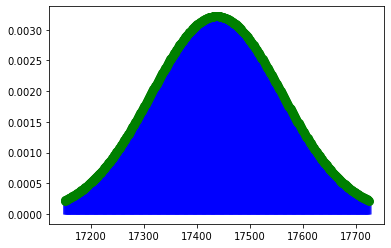

In [53]:

# For group Treatment, New_page
TNfig, TNax = plt.subplots(1,1)

TNn = 145311 #128047 + 17264 = not buying + buying
TNp = 0.12 #17264 / 145311 = 0.11880724790277405
# Probability people buying is 12%

TNx = np.arange(stats.binom.ppf(0.01, TNn, TNp), stats.binom.ppf(0.99, TNn, TNp)) #PPF, used for calculating probability %

TNax.plot(TNx, stats.binom.pmf(TNx,TNn,TNp), 'go', ms = 8, label='Binomial PMF')
TNax.vlines(TNx, 0, stats.binom.pmf(TNx,TNn,TNp), colors= 'b', lw= 5, alpha = 0.5) #lw = linewidth, alpha = thickness

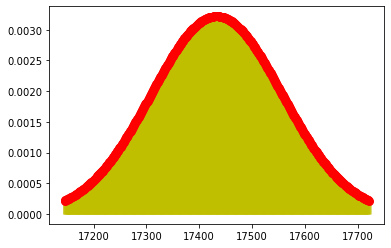

In [52]:
# For group Control, Old_page
COfig, COax = plt.subplots(1,1)

COn = 145274 #127785 + 17489 = not buying + buying
COp = 0.12 # 17264 / 145274 = 0.1188375070556328

COx = np.arange(stats.binom.ppf(0.01, COn, COp), stats.binom.ppf(0.99, COn, COp)) #PPF, used for calculating probability %

COax.plot(COx, stats.binom.pmf(COx, COn, COp), 'ro', ms = 8, label='Binomial PMF')
COax.vlines(COx, 0, stats.binom.pmf(COx,COn,COp), colors= 'y', lw= 5, alpha = 0.5) #lw = linewidth, alpha = thickness

# Hypothesis Testing
Hypothesis ;

- True Positive : Group dan Landing page menyebabkan seseorang untuk beli
- True Negative : Group menyebabkan seseorang untuk bell, namun landing page tidak.
- False Positive : Group tidak menyebabkan seseorang untuk beli, namun landing page.
- False Negative :Group dan landing page tidak menyebabkan seseorang untuk beli.